**FACTORES QUE INFLUYEN EN EL "AMOR A PRIMERA VISTA"**

Esta base de datos fue compilada luego de un experimento realizado en una Universidad por profesores de una de las cátedras de Psicología. El experimento buscaba analizar posibles diferencias entre géneros en la selección de una pareja.
Previo al experimento, se pidió a los participantes que puntuaran (del 1 al 10) la importancia de los siguientes atributos en la elección de una pareja:

1. Atractividad
2. Sinceridad
3. Inteligencia
4. Divertido
5. Ambición
6. Existencia de intereses compartidos

Durante el experimento, los distintos participantes asistieron a una cita de 4 minutos con otro participante del sexo opuesto. Luego de transcurridos los 4 minutos, se le realizaron una serie de preguntas a los participantes.
Finalizado el mismo, se pidió a los participantes que asignen un puntaje a su cita dada la serie de atributos mencionados anteriormente, si consideraban que su cita asignada les había gustado, y si la conocían previamente.

A partir de este experimento de citas surgen los siguientes interrogantes:
1) ¿Cuáles son las cualidades más importantes que influyen en la búsqueda de una pareja?
2) ¿Son las mismas cualidades las que interesan a hombres y mujeres?
3) ¿Es significativamente más importante la belleza externa en la primera cita? ¿Difiere esto entre géneros?
4) ¿Influye la edad de los participantes en la posibilidad de hacer “match” con una pareja? ¿Difiere esto entre hombres y mujeres?


Las hipótesis que se plantean son las siguientes:
1) Las cualidades que interesan a hombres y mujeres no son las mismas.
2) La belleza externa es importante en la primera cita, independientemente del género.
3) La edad influye en la posibilidad de hacer "match". Las personas de menor edad tienen mayor probabilidad de hacer “match” debido a que su menor experiencia de vida los hace menos exigentes a la hora de volver a salir con alguien.





In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
url = 'https://raw.githubusercontent.com/antodpadula/DataScienceI/main/datoscitas.csv'
dating_data = pd.read_csv(url, sep=';')
dating_data.head()

,ID_participante,Gender,Age,Income,Goal,Career,Decision,Attractiveness,Sincerity,Intelligence,Fun,Ambition,Shared Interests,Like,Probability of interest,Met Before
0,1,Female,21.0,69487.0,2.0,lawyer,Match,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0
1,2,Female,21.0,69487.0,2.0,lawyer,Match,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0
2,3,Female,21.0,69487.0,2.0,lawyer,Match,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0
3,4,Female,21.0,69487.0,2.0,lawyer,Match,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0
4,5,Female,21.0,69487.0,2.0,lawyer,Match,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0


In [3]:
dating_data.shape

(8378, 16)

El **dataset** está compuesto por **16 columnas**, las cuales se describen a continuación:
1. **ID_participante**: es el número del participante
2. **Gender:** es el género del participante, el cual se encuentra codificado como: 0 = mujer, 1 = hombre.
2. **Age:** edad del participante
3. **Income:** salario anual del participante
4. **Goal:** le preguntan al participante que es lo más importante que tiene que tener la otra persona, y le hacen elegir entre los atributos del 7 al 12
5. **Career:** es la profesión del participante
6. **Decision:** es la decisión del participante respecto a si le gustó la otra persona o no, se encuentra codificado como: 0 = No Match; 1 = Match.
7. **Attractiveness:** puntuación que le da el participante a su cita, respecto a cuán atractiva fue. Los valores van del 1 al 10.
8. **Sincerity:** puntuación que le da el participante a su cita, respecto a cuán sincera fue. Los valores van del 1 al 10.
9. **Intelligence:**	puntuación que le da el participante a su cita, respecto a cuán inteligente fue. Los valores van del 1 al 10.
10. **Fun:** puntuación que le da el participante a su cita, respecto a cuán divertida fue. Los valores van del 1 al 10.
11. **Ambition:** puntuación que le da el participante a su cita, respecto a cuán ambiciosa fue. Los valores van del 1 al 10.
12. **Shared Interests:** puntuación que le da el participante a su cita, respecto a cuánto cree que tienen en común. Los valores van del 1 al 10.
13. **Like:** puntuación que le da el participante a su cita, respecto a cuánto le gustó la misma. Los valores van del 1 al 10.
14. **Probability of interest:** puntuación que le da el participante a su cita, respecto a cuál es la probabilidad de que su cita haya gustado de él. Los valores van del 1 al 10.
15. **Met Before:** indica si los participantes se conocían previamente, codificado como 1=se conocían, y 2=no se conocen.


In [4]:
dating_data.describe()

,ID_participante,Age,Income,Goal,Attractiveness,Sincerity,Intelligence,Fun,Ambition,Shared Interests,Like,Probability of interest,Met Before
count,8378.000000,8283.000000,4279.000000,8299.000000,8147.000000,8072.000000,8053.000000,7999.000000,7637.000000,7282.000000,8109.000000,8040.000000,7974.000000
mean,4189.500000,26.358928,44887.606450,2.122063,6.187971,7.171705,7.366571,6.399675,6.778774,5.472329,6.130127,5.207525,0.951843
std,2418.664611,3.566763,17206.920962,1.407181,1.950344,1.741646,1.551680,1.954990,1.795916,2.157787,1.841129,2.131630,0.990201
min,1.000000,18.000000,8607.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.250000,24.000000,31516.000000,1.000000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,5.000000,4.000000,0.000000
50%,4189.500000,26.000000,43185.000000,2.000000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,6.000000,5.000000,0.000000
75%,6283.750000,28.000000,54303.000000,2.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,2.000000
max,8378.000000,55.000000,109031.000000,6.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8.000000


In [5]:
dating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_participante          8378 non-null   int64  
 1   Gender                   8378 non-null   object 
 2   Age                      8283 non-null   float64
 3   Income                   4279 non-null   float64
 4   Goal                     8299 non-null   float64
 5   Career                   8289 non-null   object 
 6   Decision                 8349 non-null   object 
 7   Attractiveness           8147 non-null   float64
 8   Sincerity                8072 non-null   float64
 9   Intelligence             8053 non-null   float64
 10  Fun                      7999 non-null   float64
 11  Ambition                 7637 non-null   float64
 12  Shared Interests         7282 non-null   float64
 13  Like                     8109 non-null   float64
 14  Probability of interest 

**Analizamos si hay valores nulos**

In [5]:
dating_data.isnull().sum()

ID_participante               0
Gender                        0
Age                          95
Income                     4099
Goal                         79
Career                       89
Decision                     29
Attractiveness              231
Sincerity                   306
Intelligence                325
Fun                         379
Ambition                    741
Shared Interests           1096
Like                        269
Probability of interest     338
Met Before                  404
dtype: int64

**Analizamos algunas métricas**

In [4]:
edad_promedio = np.mean(dating_data['Age']) #Mediana de la edad de los participantes
print(edad_promedio)

edad_minima = np.min(dating_data['Age']) #Edad minima
print(edad_minima)

edad_maxima = np.max(dating_data['Age']) #Edad maxima
print(edad_maxima)

26.358927924664975
18.0
55.0


La edad de los participantes tiene un rango entre 18 y 55 años de edad, siendo el promedio de edad de los mismos 26 años.

GRÁFICOS CON **Matplotlib**

**Analizamos la distribución de edad de las participantes mujeres**

Text(0.5, 1.0, 'Histograma de Edad de los participantes mujeres')

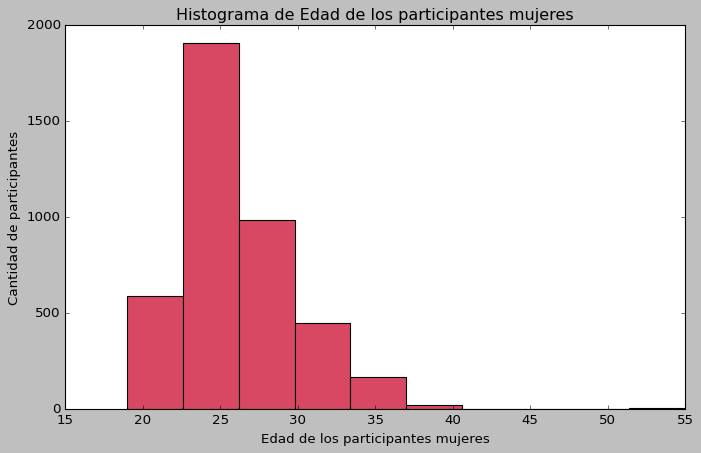

In [6]:
mpl.style.use('classic')
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(x= dating_data[dating_data['Gender']== 'Female']['Age'], bins=None, density=False, orientation='vertical', color="#D94862", edgecolor="black")
ax.set_xlabel('Edad de los participantes mujeres')
ax.set_ylabel('Cantidad de participantes')
ax.set_title('Histograma de Edad de los participantes mujeres')

La mayor cantidad de participantes mujeres rondan los 25 años de edad.

**Analizamos la distribución de edad de los participantes hombres**

Text(0.5, 1.0, 'Histograma de Edad de los participantes hombres')

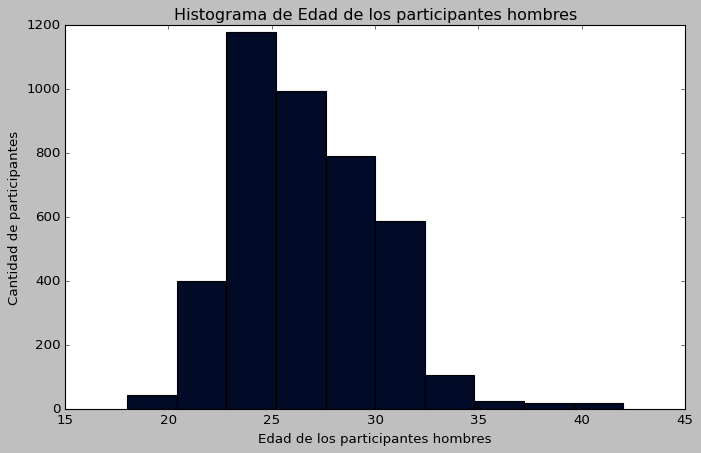

In [7]:
mpl.style.use('classic')
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(x= dating_data[dating_data['Gender']== 'Male']['Age'], bins=None, density=False, orientation='vertical', color="#010A26", edgecolor="black")
ax.set_xlabel('Edad de los participantes hombres')
ax.set_ylabel('Cantidad de participantes')
ax.set_title('Histograma de Edad de los participantes hombres')

La mayor parte de los participantes hombres tambien rondan los 25 años de edad.

**Analizamos si hay una relación entre el salario y la edad de los participantes**

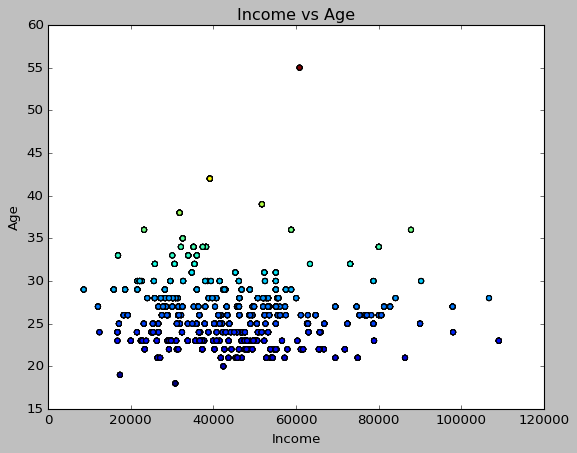

In [8]:
plt.scatter(dating_data['Income'], dating_data['Age'], c=dating_data['Age'])
plt.xlabel('Salario')
plt.ylabel('Edad')
_ = plt.title('Salario vs Edad de los participantes')

No pareciera observarse una relación entre el salario y la edad de los participantes. Se observa un outlier, al parecer una personade 55 años con un salario muy por encima del promedio de su edad.

GRÁFICOS CON **Seaborn**

**Analizamos la cantidad de participantes por género**

<ipython-input-9-5f7206d6bde5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = "Gender", data = dating_data, palette='Pastel1')


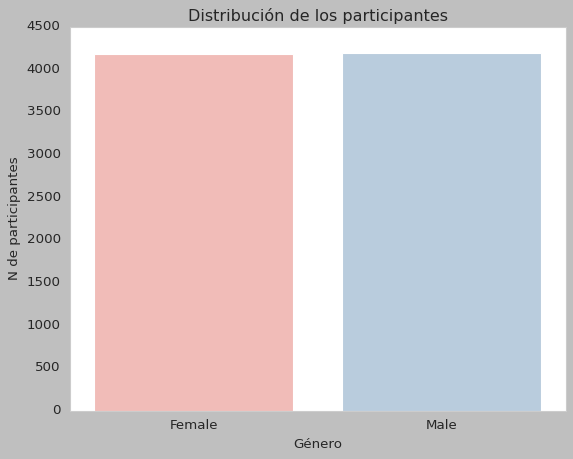

In [9]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes
sns.set_style("whitegrid", {'grid.color': 'white'})
ax = sns.countplot(x = "Gender", data = dating_data, palette='Pastel1')
plt.title('Distribución de los participantes')
plt.xlabel('Género')
plt.ylabel('N de participantes')
plt.show()



La cantidad de participantes se distribuye equitativamente entre hombres y mujeres.

**Analizamos los participantes que hicieron y no hicieron "match" con su cita según su género.**

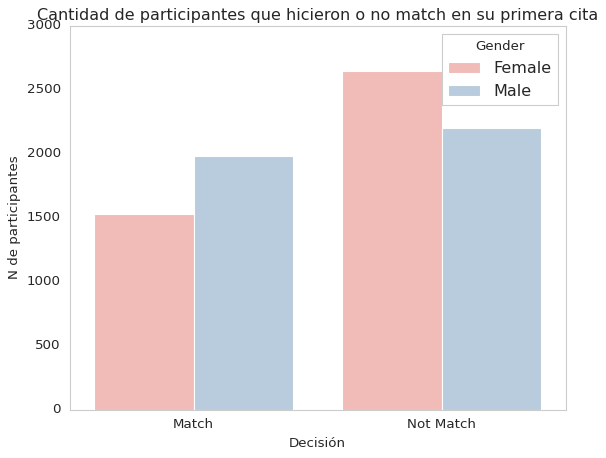

In [10]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes
sns.set_style("whitegrid", {'grid.color': 'white'})
ax = sns.countplot(x = "Decision", data = dating_data, hue="Gender", legend=True, palette="Pastel1")
plt.title('Cantidad de participantes que hicieron o no match en su primera cita')
plt.xlabel('Decisión')
plt.ylabel('N de participantes')
plt.show()

Hay una mayor cantidad de participantes hombres que hicieron "match" con su cita respecto a la cantidad de mujeres.

**Analizamos la distribución de edades de los participantes indistintamente de su género.**

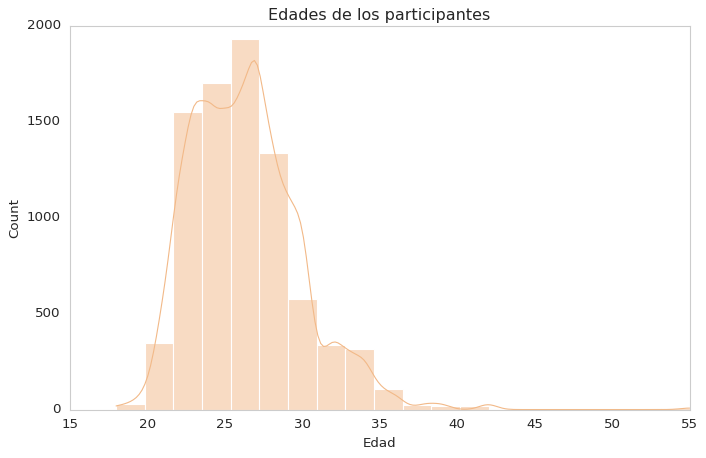

In [11]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid", {'grid.color': 'white'})
sns.histplot(dating_data['Age'].dropna(), bins=20, kde=True, color='#F2B988')
plt.title('Edades de los participantes')
plt.xlabel('Edad')
plt.ylabel('Count')
plt.show()

La mayor cantidad de participantes se encuentra entre los 20 y 30 años de edad.

**Analizamos la gran diversidad de profesiones de los participantes.**

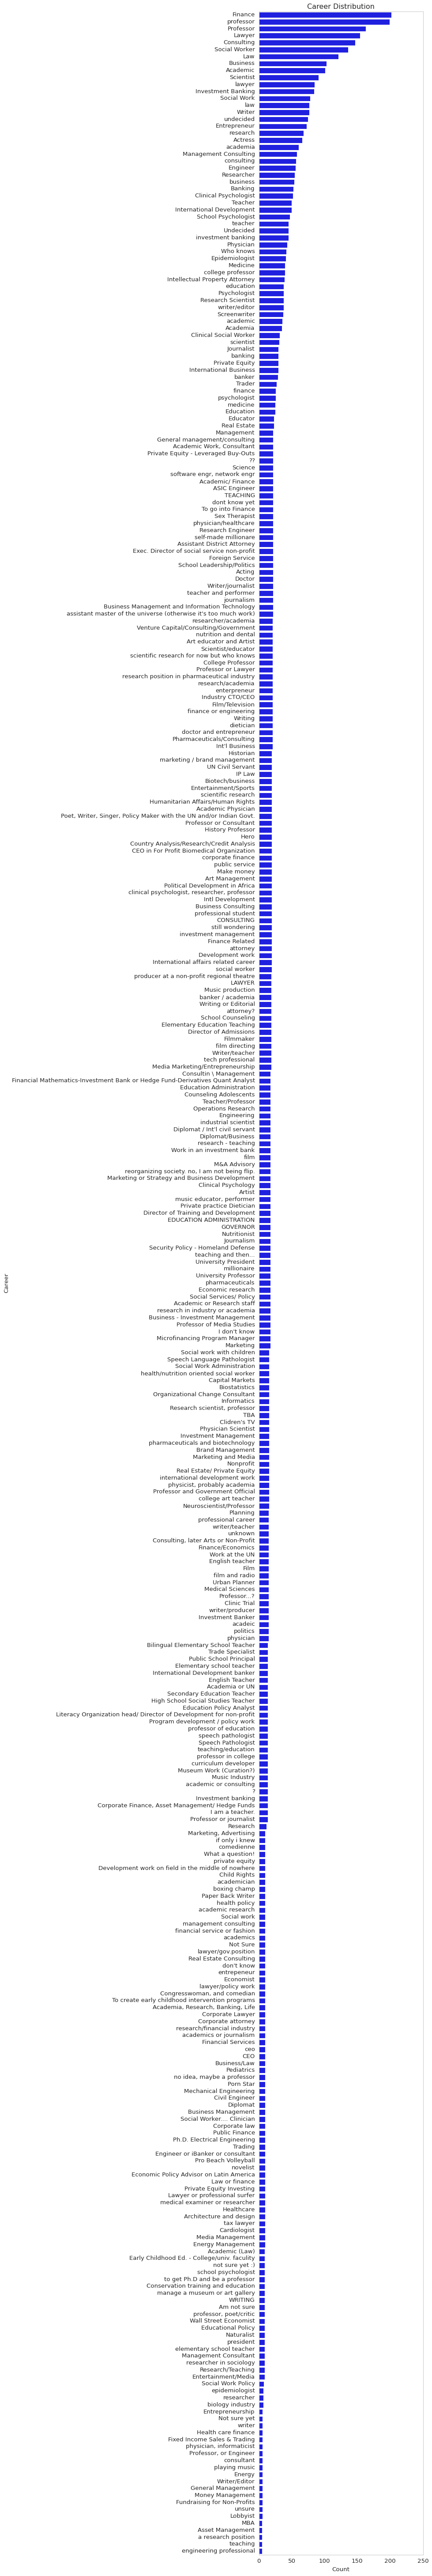

In [12]:
plt.figure(figsize=(6, 90))
sns.countplot(y='Career', data=dating_data, order=dating_data['Career'].value_counts().index)
plt.title('Career Distribution')
plt.xlabel('Count')
plt.ylabel('Career')
plt.show()

**ANALIZAMOS LAS PREGUNTAS PLANTEADAS PARA EL PRESENTE ESTUDIO..**

**1) CUÁL ES LA CUALIDAD MÁS IMPORTANTE QUE INFLUYE EN LA BÚSQUEDA DE UNA PAREJA?**

Para responder esta pregunta se realizó un gráfico de barras con la columna "Goal" que indica cuál de todas las cualidades mencionadas previamente es la más importante para cada participante.

La hipótesis planteada es la siguiente:

*La belleza externa es lo más importante en la primera cita, independientemente del género del participante.*

<ipython-input-96-405698e0bd3a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Goal', data=dating_data, palette= "flare")


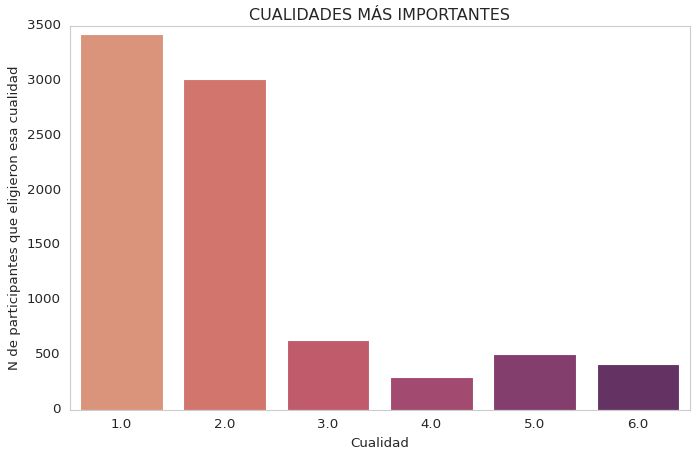

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid", {'grid.color': 'white'})
sns.countplot(x='Goal', data=dating_data, palette= "flare")
plt.title('CUALIDADES MÁS IMPORTANTES')
plt.xlabel('Cualidad')
plt.ylabel('N de participantes que eligieron esa cualidad')
plt.show()

Se observa que, sin considerar el género de los participantes, la cualidad que más influye en la elección de una pareja en la primera cita es la "atractividad", es decir, la belleza externa de la otra persona. La segunda cualidad más importante es la sinceridad. El resto de las cualidades parecen tener una importancia relativamente similar entre ellas para los participantes.

**2) SON LAS MISMAS CUALIDADES LAS QUE BUSCAN HOMBRES Y MUJERES?**

La hipótesis es la siguiente:

*Las cualidades que interesan a hombres y mujeres no son las mismas.*

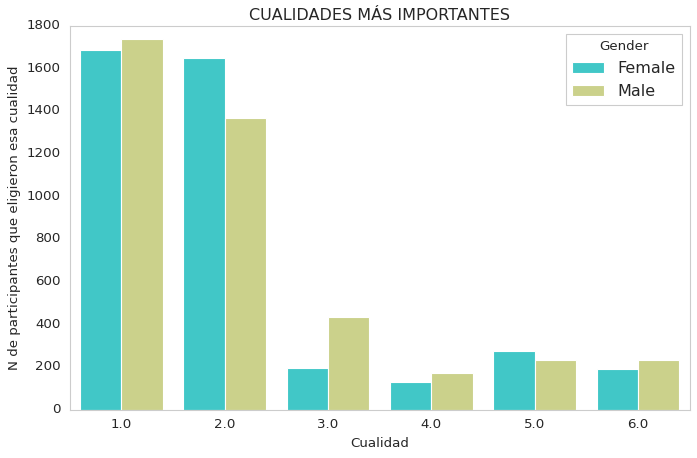

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid", {'grid.color': 'white'})
sns.countplot(x='Goal', data=dating_data, hue='Gender', palette= "rainbow")
plt.title('CUALIDADES MÁS IMPORTANTES')
plt.xlabel('Cualidad')
plt.ylabel('N de participantes que eligieron esa cualidad')
plt.show()

Se observa que considerando el género de los participantes, los intereses de los participantes resultan también similares. Tanto hombres como mujeres consideran que lo más importante en una primera cita es la belleza externa de su cita, y en segundo lugar la sinceridad. En el resto de las cualidades la importancia parece distribuirse equitativamente, con excepción de la 3er cualidad: "Inteligencia". En este caso, se observa una diferencia entre géneros: para los hombres resulta más importante esta cualidad que para las mujeres.

**3) ¿ INFLUYE LA EDAD DE LOS PARTICIPANTES EN LA POSIBILIDAD DE HACER "MATCH" CON UNA PAREJA? ¿ DIFIERE ÉSTO ENTRE HOMBRES Y MUJERES?**

Text(0, 0.5, 'Edad')

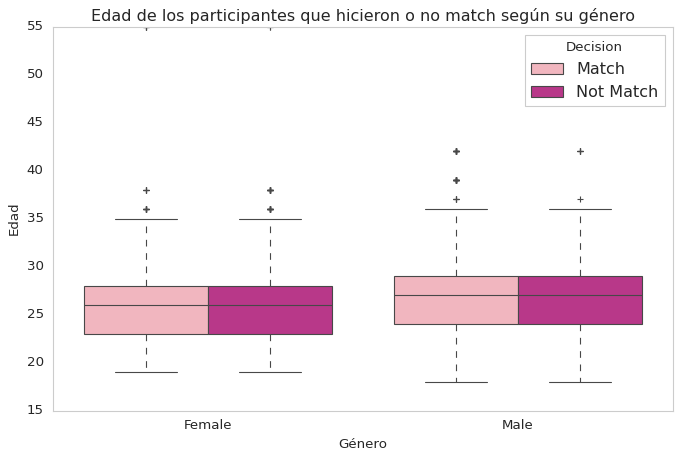

In [ ]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid", {'grid.color': 'white'})
sns.boxplot(x=dating_data.Gender, y= dating_data.Age, hue=dating_data.Decision, palette="RdPu")
plt.title('Edad de los participantes que hicieron o no match según su género')
plt.xlabel('Género')
plt.ylabel('Edad')

Se observa que la edad parece no influir en la posibilidad de hacer "match" con una pareja en la primera cita. No se observan diferencias entre las edades de los participantes de cada género. Respecto a la posibilidad de hacer "match" con una pareja, en el caso de los que sí lo hicieron parece ser que la mediana de la edad es levemente más alta.